# TP6_ML :  SVM

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import cvxopt
from sklearn.svm import SVC

## 1- Plan séparatur:

In [2]:
def aff_donnees(X,y,bornex,borney,s=50):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=s, cmap='winter')
    plt.xlim(bornex)
    plt.ylim(borney)

In [3]:
def affichePlan(w,b,borneX):
    x1_min=borneX[0][0]-1
    x1_max=borneX[0][1]+1

    x2_min=borneX[1][0]-1
    x2_max=borneX[0][1]+1
    
    x=np.arange(x1_min,x1_max,1/10) 
    #vectorisation des calculs
    y=np.zeros(x.shape)
    y=(-w[0]*x-b)/w[1]
    
    #borney=[y[0],y[len(y)]]
    #affichage-------------------
    plt.figure()
    plt.plot(x,y,label='f(x)- SVM',c='r')
    plt.xlim([x1_min,x1_max])
    plt.ylim([x2_min,x2_max])
    plt.legend()
    plt.grid()

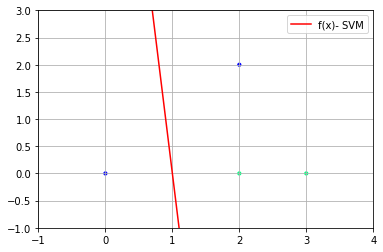

In [4]:
#data:
X=np.array([[0,2,2,3],[0,2,0,0]]).T
y=np.array([-1,-1,1,1])
#bornes
bornex=[np.min(X[:,0]-1),np.max(X[:,0])+1]
borney=[np.min(X[:,1]-1),np.max(X[:,1])+1]

# -------affichage de hyperplan de W=[1,0.1], b=-1
w=[1,0.1]
b=-1
borne=[[0,3],[0,2]]

affichePlan(w,b,borne)
aff_donnees(X,y,bornex,borney,s=10)

#on constate qu'avec les paramètre données, l'hyperplan ne correspond pas


## SVM Linéaire dans le primal

In [5]:
def Resoud_primal(X,y):
    N= len(y)
    print("Nombre d'exemple N= ",N)
    n=X.shape[1]        #nombre de features (nombre de paramètres)
    print("dimension dataset n= ",n) 

    q=np.zeros((n+1,1)) #dimension  (n+1)x1 
    print("shape q= ",q.shape)
    q=cvxopt.matrix(q)
    
    P1=np.concatenate((np.zeros((1,1)),np.zeros((1,n))),axis=1)
    P2=np.concatenate((np.zeros((n,1)),np.eye(n)),axis=1)
    P=np.concatenate((P1,P2),axis=0)
    print("shape P= ",P.shape)
    P=cvxopt.matrix(P)
    for i in range(N):
        g=np.concatenate((np.reshape(-y[i],(1,1)),np.reshape(-y[i]*X[i][:],(1,2))),axis=1)
        if i==0:
            G=g
        else:
            G=np.concatenate((G, g), axis=0)
    print("shape G= ",G.shape)
    G=cvxopt.matrix(G+0.)
    h =-np.ones((N,1))
    print("shape h= ",h.shape)
    h=cvxopt.matrix(h+0.)
    sol=cvxopt.solvers.qp(P,q,G,h)
    z=sol['x'] 
    b=z[0]
    w=z[1:]
    return w,b

Nombre d'exemple N=  4
dimension dataset n=  2
shape q=  (3, 1)
shape P=  (3, 3)
shape G=  (4, 3)
shape h=  (4, 1)
     pcost       dcost       gap    pres   dres
 0:  3.2653e-01  1.9592e+00  6e+00  2e+00  4e+00
 1:  1.5796e+00  8.5663e-01  7e-01  0e+00  2e-15
 2:  1.0195e+00  9.9227e-01  3e-02  1e-16  1e-15
 3:  1.0002e+00  9.9992e-01  3e-04  2e-16  2e-15
 4:  1.0000e+00  1.0000e+00  3e-06  3e-16  7e-16
 5:  1.0000e+00  1.0000e+00  3e-08  4e-16  7e-16
Optimal solution found.

la solution optimale:
 w=[ 1.00e+00]
[-1.00e+00]
 , b= -1.0000000134075104


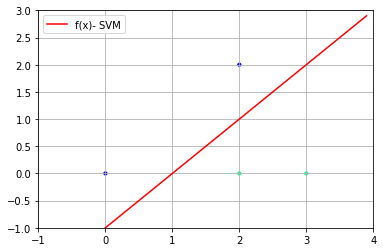

In [6]:
# --- test de la partie 2: 
#data:
X=np.array([[0,2,2,3],[0,2,0,0]]).T
y=np.array([-1,-1,1,1])
#bornes
bornex=[np.min(X[:,0]-1),np.max(X[:,0])+1]
borney=[np.min(X[:,1]-1),np.max(X[:,1])+1]

#optimisation:
w,b=Resoud_primal(X,y)
print("\nla solution optimale:\n w={} , b= {}".format(w,b))

#---affichage------
affichePlan(w,b,borne)
aff_donnees(X,y,bornex,borney,s=10)


### QST:

### QST 1: 
l'hyperplan obtenu a l'air correct, $w=[1,-1] , b=-1$  et c'est les mêmes résultats obtenus dans le cours.

### QST 2: 
Ajout du point $x=[2.1,2.5] étiquette 1 $

Nombre d'exemple N=  5
dimension dataset n=  2
shape q=  (3, 1)
shape P=  (3, 3)
shape G=  (5, 3)
shape h=  (5, 1)
     pcost       dcost       gap    pres   dres
 0:  1.8212e-01  5.5124e+00  1e+01  2e+00  5e+00
 1:  5.5352e-01  1.0158e+01  5e+00  1e+00  3e+00
 2:  1.0266e+00  4.3072e+01  7e+00  1e+00  3e+00
 3:  9.6056e+00  1.2385e+02  2e+01  1e+00  2e+00
 4:  5.1885e+02  2.6193e+02  3e+02  9e-15  4e-11
 5:  3.2241e+02  3.1119e+02  1e+01  4e-15  7e-11
 6:  3.1309e+02  3.1298e+02  1e-01  5e-15  3e-11
 7:  3.1300e+02  3.1300e+02  1e-03  4e-15  7e-12
 8:  3.1300e+02  3.1300e+02  1e-05  4e-15  4e-11
Optimal solution found.

la solution optimale:
 w=[ 2.50e+01]
[-1.00e+00]
 , b= -49.00000074364592


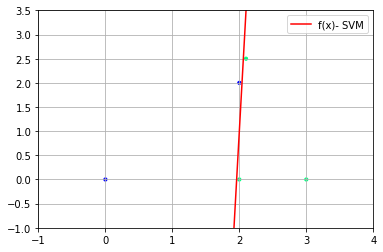

In [7]:
#data:
X=np.array([[0,2,2,3,2.1],[0,2,0,0,2.5]]).T
y=np.array([-1,-1,1,1,1])
#bornes
bornex=[np.min(X[:,0]-1),np.max(X[:,0])+1]
borney=[np.min(X[:,1]-1),np.max(X[:,1])+1]

#optimisation:
w,b=Resoud_primal(X,y)
print("\nla solution optimale:\n w={} , b= {}".format(w,b))

#---affichage------
affichePlan(w,b,borne)
aff_donnees(X,y,bornex,borney,s=10)

### QST 3: 
Ajout du point $x=[1.5,2.5]   étiquette 1 $

dans ce cas, on constate qu'on peut pas tracer la frontière car il y 'a un exemple $x=[1.5,2.5]$ est mal classé 

Nombre d'exemple N=  6
dimension dataset n=  2
shape q=  (3, 1)
shape P=  (3, 3)
shape G=  (6, 3)
shape h=  (6, 1)
     pcost       dcost       gap    pres   dres
 0:  1.3223e-01  3.6037e+00  6e+00  2e+00  1e-15
 1:  4.7494e-02  7.3444e+00  1e+00  1e+00  2e-15
 2:  1.1415e-03  3.4268e+01  3e+00  1e+00  2e-14
 3:  1.3174e-05  4.3453e+02  4e+00  1e+00  8e-14
 4:  4.1696e-10  4.8000e+04  5e+00  1e+00  1e-11
 5:  4.1031e-14  4.5327e+08  5e+02  1e+00  3e-08
 6:  4.1031e-18  4.2758e+14  4e+06  1e+00  4e-02
 7:  4.1034e-22  4.0334e+22  4e+12  1e+00  1e+07
 8:  1.4727e-23  3.7160e+32  1e+21  1e+00  2e+17
 9:  4.0328e-23  1.3839e+42  5e+30  1e+00  4e+26
10:  4.3983e-23  8.6652e+51  3e+40  1e+00  3e+36
11:  4.2452e-23  7.0326e+61  2e+50  1e+00  6e+45
12:  4.0252e-23  5.4251e+71  2e+60  1e+00  3e+55
13:  3.9599e-23  1.5684e+81  5e+69  1e+00  2e+65
14:  3.9284e-23  2.4644e+90  8e+78  1e+00  4e+74
15:  1.4695e-24  2.5911e+101  5e+89  1e+00  4e+85
16:  1.6973e-24  2.5122e+109  5e+97  1e+00  1e+93
17

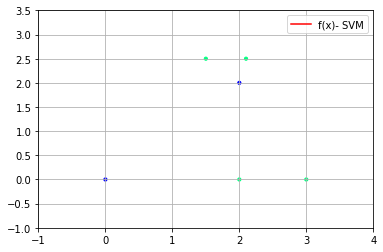

In [8]:
#data:
X=np.array([[0,2,2,3,2.1,1.5],[0,2,0,0,2.5,2.5]]).T
y=np.array([-1,-1,1,1,1,1])
#bornes
bornex=[np.min(X[:,0]-1),np.max(X[:,0])+1]
borney=[np.min(X[:,1]-1),np.max(X[:,1])+1]

#optimisation:
w,b=Resoud_primal(X,y)
print("\nla solution optimale:\n w={} , b= {}".format(w,b))

#---affichage------
affichePlan(w,b,borne)
aff_donnees(X,y,bornex,borney,s=10)

## SVM à marge souple:

C règle le compromis entre une grande marge et le respect des contraintes
* si C est grand, la marge sera petite, pour que le maximum de point soit bien classé
* si C est petit, la marge sera plus grande car on est plus laxiste sur les données mal classées
* C est à optimiser sur une base de validation

In [9]:
def aff_frontiere(X,y,bornex,borney,model):
    aff_donnees(X,y,bornex,borney,50)
    xx, yy = np.meshgrid(np.linspace(bornex[0], bornex[1],50), np.linspace(borney[0], borney[1],50))
    
    xy =np.concatenate((np.reshape(xx,(xx.shape[0]*xx.shape[1],1)),np.reshape(yy,(yy.shape[0]*yy.shape[1],
    1))),axis=1)
    P = model.predict(xy)
    aff_donnees(xy,P,bornex,borney,1)

w= [24.98702955 -0.99950406]
b= -48.974342065517


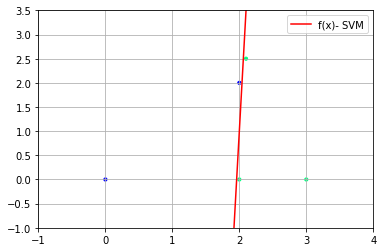

In [10]:
# On va utiliser l’apprentissage SVM de python qui autorise les marges souples.

#data:
X=np.array([[0,2,2,3,2.1],[0,2,0,0,2.5]]).T
y=np.array([-1,-1,1,1,1])

#bornes
bornex=[np.min(X[:,0]-1),np.max(X[:,0])+1]
borney=[np.min(X[:,1]-1),np.max(X[:,1])+1]

# optimisation SKlearn
model = SVC(kernel='linear', C=1000)
model.fit(X, y)
w = model.coef_[0]
b = model.intercept_[0]

print("w=",w)
print("b=",b)

#---affichage------
affichePlan(w,b,borne)
aff_donnees(X,y,bornex,borney,s=10)


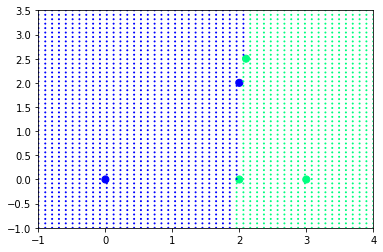

In [11]:
aff_frontiere(X,y,bornex,borney,model)
#la fonction aff_frontière dessine les frontières avec des points

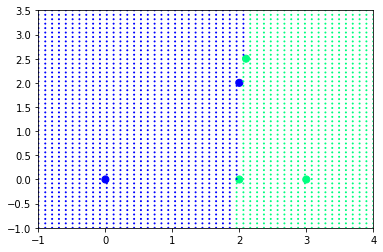

In [12]:
# optimisation SKlearn
model1 = SVC(kernel='poly')
model1.fit(X, y)

aff_frontiere(X,y,bornex,borney,model)
#la fonction aff_frontière dessine les frontières avec des points

## SVM avec Kernel 

In [14]:
# importation des données
f = np.load('TP6.npz',allow_pickle=True)
X=f['arr_0']
y=f['arr_1']

#bornes
bornex=[np.min(X[:,0]-1),np.max(X[:,0])+1]
borney=[np.min(X[:,1]-1),np.max(X[:,1])+1]


* un noyeau linéaire ne peut pas apprendre sur des frontières non linéaires.
* un SVN avec un noyeau rbf sur les données linéairement séparables

on va tester les noyeau polynomiaux et gaussiens:
* polynomial: $k(x,z)=(x.T*z+1)**p$
* gaussian :  $k(x,z)=exp(-|x-z|²/(2*sigma²))$

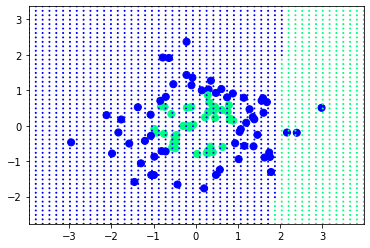

In [15]:
# optimisation SKlearn
# optimisation polynomial (kernel polynomial)
model2 = SVC(kernel='poly')
model2.fit(X, y)

aff_frontiere(X,y,bornex,borney,model)
#la fonction aff_frontière dessine les frontières avec des points

In [21]:
# optimisation SKlearn
# optimisation gaussian (kernel gaussian)
model3 = SVC(kernel='rbf',C=10)
model3.fit(X, y)

aff_frontiere(X,y,bornex,borney,model)
#la fonction aff_frontière dessine les frontières avec des points

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.